# Chapter 7. Unsupervised Learning

In many applications, observations need to be divided into similar groups based on observed features. For example, retailers may want to divide potential customers into groups, in order to target a marketing campaign at the customers who are most likely to respond positively. This practice is known as _market segmentation_.

The general problem of grouping observations based on observed features is known as _clustering_ in machine learning. Like the classification problems of Chapter 6, clustering is about dividing observations into categories based on features. Unlike classification, we do not have ground truth labels that specify what the categories should be; they have to be inferred from the data. In other words, with classification, the training data contains both features $X$ and labels $y$; with clustering, the training data only contains features $X$.

For this reason, clustering is an example of an _unsupervised learning_ problem, in contrast to the _supervised learning_ problems of the previous chapters. This terminology comes from the following analogy to human learning.  Imagine a child that is trying to learn the difference between shapes and has several examples of each shape in front of him.

![](https://github.com/dlsun/pods/blob/master/07-Unsupervised-Learning/shape_sorter.jpg?raw=1)

On the one hand, the child may be _supervised_ by an adult who gives the child feedback on each answer: "Yes, that is a circle....No, that was a square....No, that was actually a circle...."  This process is analogous to classification, where the labels in the training data can be used to provide "feedback" on how well the model is doing. Regression and classification are both examples of _supervised learning_ because labels are available in the training data.

On the other hand, the child may be _unsupervised_ and completely left to his own devices. Eventually, he may figure out that there is something similar about all of the circles that distinguish them from the squares. But he won't know that they are called "circles", nor will he know whether he is right or not. This is the fundamental challenge of unsupervised learning. Clustering is an example of _unsupervised learning_ because labels are not available in the training data.

We will practice clustering on a dataset containing measurements of 150 iris flowers, collected by the statistician R. A. Fisher.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's focus on just two of the variables, the petal length and width, so that we can easily visualize the data. Based on the scatterplot below, how many clusters are there in this data set? Can you devise an algorithm that would automatically identify those clusters?

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

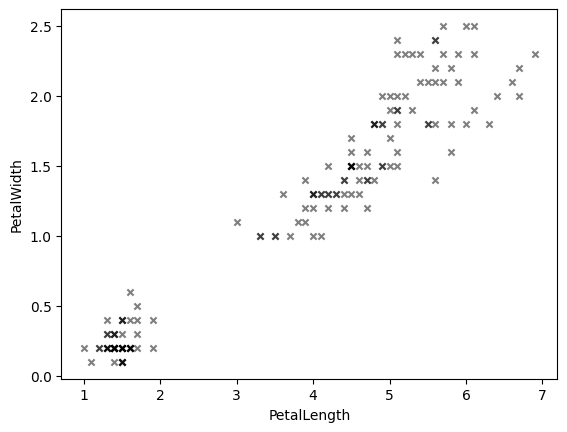

In [ ]:
X_train = df_iris[["PetalLength", "PetalWidth"]]
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c="black", marker="x", alpha=.5)

# Chapter 7.1 $K$-Means Clustering

$K$-means is an algorithm for finding clusters in data. The idea behind $k$-means is simple: each cluster has a "center" point called the **centroid**, and each observation is associated with the cluster of its nearest centroid. The challenge is finding those centroids. The $k$-means algorithm starts with a random guess for the centroids and iteratively improves them.

The steps are as follows:

1. Initialize $k$ centroids at random.
2. Assign each point to the cluster of its nearest centroid.
3. (After reassignment, each centroid may no longer be at the center of its cluster.) Recompute each centroid based on the points assigned to its cluster.
4. Repeat steps 2 and 3 until no points change clusters.

# Implementing K-Means from Scratch

First, we will implement the $k$-means algorithm from scratch. First, let's sample 3 points at random from the iris data to serve as the initial centroids.

,PetalLength,PetalWidth
r,5.1,2.4
b,5.5,2.1
y,1.3,0.2


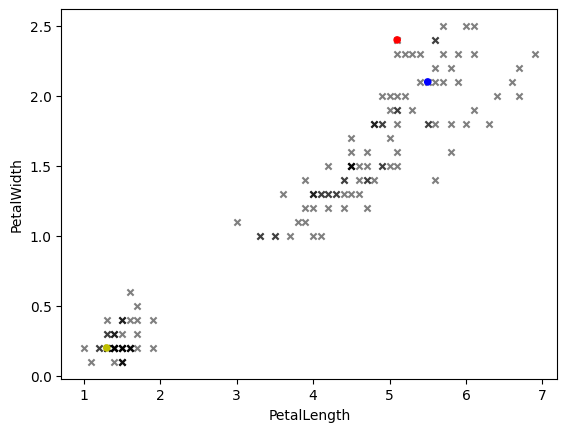

In [ ]:
# Initialize 3 centroids at random from the data.
centroids = X_train.sample(3)

# Call the three clusters "red", "blue", "yellow" for convenience.
centroids.index = ["r", "b", "y"]

# Plot these centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="PetalLength", y="PetalWidth",
                       c=centroids.index, ax=ax)

centroids

Now we assign each point to the cluster of its nearest centroid.

In [ ]:
# Finds the nearest centroid to a given observation.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train.loc[0])

'y'

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

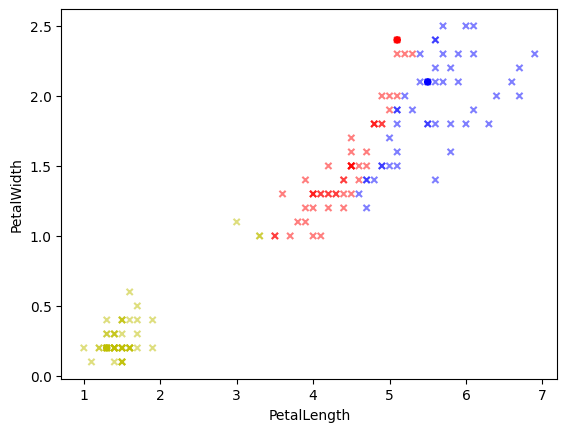

In [ ]:
# Apply the function to the entire data set.
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Plot the cluster assignments.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="PetalLength", y="PetalWidth",
                       c=centroids.index, ax=ax)

Notice that some of the centroids are no longer at the center of their clusters. We can fix that by redefining the centroid to be the mean of the points in its cluster.

,PetalLength,PetalWidth
b,5.573913,1.917391
r,4.403922,1.496078
y,1.562264,0.288679


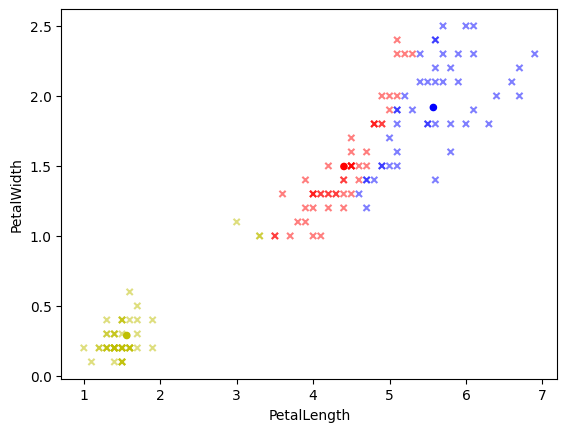

In [ ]:
# Calculate the mean length and width for each cluster.
centroids = X_train.groupby(clusters).mean()

# Let's plot the new centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="PetalLength", y="PetalWidth",
                       c=centroids.index, ax=ax)

centroids

Now, there may be some points that are no longer assigned to their closest centroid, so we have to go back and re-assign clusters. But that may cause the centroids to no longer be at the center of their cluster, so we have to recalculate the centroids. And so on. This process continues until the cluster assignments stop changing.

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

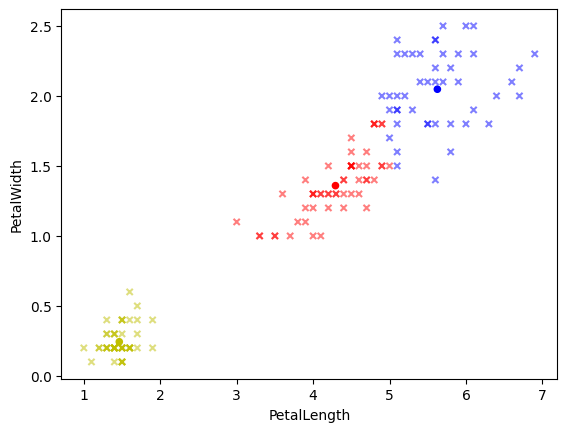

In [ ]:
# Assign points to their nearest centroid.
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="PetalLength", y="PetalWidth",
                       c=centroids.index, ax=ax)

We can run the code in the above cell over and over until the clusters stop changing. This is the final cluster assignment.

It is not so easy to visualize the clusters when there are more than 2 features. But we can wrap the same algorithm inside a loop that continues until the cluster assignments do not change from one step to the next. One of the exercises below walks you through such an implementation.

# K-Means in _scikit-learn_

We rarely need to implement the $k$-means algorithm from scratch because it is available in _scikit-learn_. The API for _scikit-learn_'s $k$-means model is similar to the API for supervised learning models, like $k$-nearest neighbors, except that the `.fit()` method only takes in `X`, not `X` and `y`. This makes sense because in unsupervised learning, there are no ground truth labels `y`.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
# Extract the centroids and the clusters.
centroids = model.cluster_centers_
clusters = model.labels_

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

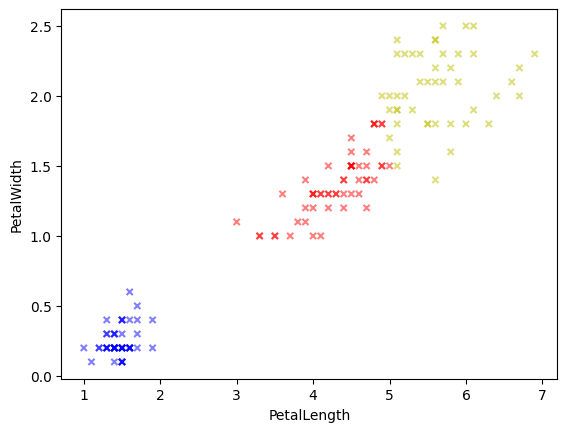

In [ ]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y"
})

# Plot the data
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, marker="x", alpha=.5)

We can call `model.predict()` to get the cluster assignment for a new observation. This will simply assign the new observation to the nearest cluster without recalculating the centroids. (If this observation had been in the training data, then assigning the new observation to a cluster would require recalculating the centroid, which would in turn require reassigning observations to clusters, and so on.)

For example, consider a flower whose petal has a length of 5.0 and a width of 0.5. It's obvious which cluster this point should be assigned to. Let's check that this is indeed the case, by calling `.predict()` on our fitted model.

In [ ]:
model.predict([[5.0, 0.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

## A Note about Standardization

Note that we did not standardize the variables in the example above. Just as with $k$-nearest neighbors, it is generally a good idea to standardize your variables before applying $k$-means. Let's see how different the clusters would be if the variables had been standardized.

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

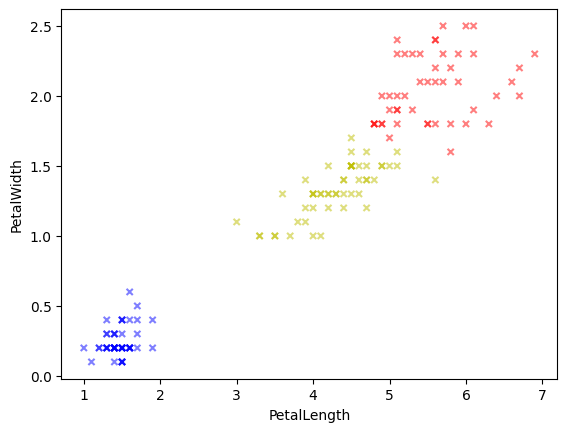

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

model = KMeans(n_clusters=3)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({
    0: "r",
    1: "b",
    2: "y"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, marker="x", alpha=.5)

In [ ]:
from sklearn.metrics import silhouette_score

labels = model.labels_
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


0.57932547